# Prezentacja implementacji rozwiązania problemu 3

## Init

In [12]:
using Plots
using LaTeXStrings
using Statistics
using LinearAlgebra

Ustawiamy rządaną dokładność

In [13]:
Float64

Float64

### Całkowanie, liczenie iloczynu skalarnego i błędu

Funkcja obliczająca całkę $\int_a^b f(x)dx$ metodą Romberga

In [14]:
function integrate(f, a, b)
    M = 20 # maksymalna ilość kroków
    acc = 1e-5 # żądana dokładność
    
    Rc = Vector{Float64}(undef, M) # Wektor z obecnym rzędem macierzy R obliczonym metodą Romberga
    Rp =  Vector{Float64}(undef, M) # Wektor z poprzednim rzędem macierzy R
    h = (b-a) # krok
    Rp[1] = (f(a) + f(b))*h*0.5 # początek, trapezami

    for i = 2:M
        h = h/2
        c = 0
        ep = 2^(i-2)
        
        for j = 1:ep
            c += f(a + (2*j-1)*h)
        end
        Rc[1] = h*c + 0.5*Rp[1]
        
        for j = 2:i
            n_k = 4^(j-1)
            Rc[j] = (n_k*Rc[j-1] - Rp[j-1])/(n_k - 1) # obliczamy R_nm zgodnie z rekurencyjnym wzorem
        end
        
        if i > 2 && abs(Rp[i-1] - Rc[i]) < acc
            return Rc[i-1] # uzyskaliśmy żądaną dokładność
        end
        
        Rp, Rc = Rc, Rp # obecny wiersz staje się poprzednim
    end
    return Rp[M]
end 
        

integrate (generic function with 1 method)

Funkcja obliczająca iloczyn skalarny z definicji: $\langle f,g\rangle =  \int_0^1 xf(x)g(x) dx$

In [15]:
function dot_prod(f, g)
    function fg(x)
        return x*f(x)*g(x)
    end
    return integrate(fg, 0, 1)
end

dot_prod (generic function with 1 method)

Funkcja obliczająca błąd $\Vert f - w^*\Vert^2 = \langle f-w^*,f-w^*\rangle$ wielomianu $w^*$.

In [16]:
function get_err(f, w)
    function diff(x)
        return f(x) - w(x)
    end
    return dot_prod(diff, diff)
end

get_err (generic function with 1 method)

### Wyznaczenie wielomianu optymalnego $w^*$

Funkcje pomocnicze

In [17]:
function x_pow(pow) # funkcja zwaracjąca funkcję x^pow
    function f(x)
        return x^pow
    end
    return f
end

function get_poly(alphas) # funkcja zwracająca wielomian w o współczynnikach alfa
    n = size(alphas,1)
    function poly(x)
        X = [x_pow(i-1)(x) for i = 1:n]
        return dot(X,alphas)
    end
    return poly
end

get_poly (generic function with 1 method)

Funkcja znajdująca wielomian optymalny $n$-tego stopnia dla funkcji $f$ 

In [18]:
function get_opt(f, n) # f
    A = zeros((n+1, n+1))
    B = zeros((n+1,1))
    C = zeros((n+1,1))
    # tworzymy macierz A z iloczynów skalarnych podstawowej bazy PI_n
    for i = 1:(n+1)
        for j = 1:(n+1)
            A[i,j] = 1 / (i+j)
        end
    end
    for i = 1:(n+1)
        C[i,1] = dot_prod(f,x_pow(i-1))
    end
    B = inv(A)*C
    return get_poly(B)
end

get_opt (generic function with 1 method)

Szukamy optymalnego $w_n^*$ spełniającego $\Vert f - w_n^*\Vert^2  < \varepsilon$ 

In [19]:
function get_ans(f, eps)
    n = 0
    W = []
    while true
        print(n)
        print('\n')
        w = get_opt(f, n)
        n += 1
        err = get_err(f, w)
        push!(W,w)
        if err < eps || n > 100
            return W
        end
    end
    return W
end

get_ans (generic function with 1 method)

In [20]:
W = get_ans(sin, 1e-3)

0
1


2-element Array{Any,1}:
 var"#poly#13"{Array{Float64,2},Int64}([0.6023374353983306], 1)
 var"#poly#13"{Array{Float64,2},Int64}([0.06317073958675616; 0.8087500437173623], 2)

┌ Info: Saved animation to 
│   fn = /home/maurykdell/Desktop/university/S3/AN/P2/tutorial_anim_fps30.gif
└ @ Plots /home/maurykdell/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/home/maurykdell/Desktop/university/S3/AN/P2/tutorial_anim_fps30.gif")
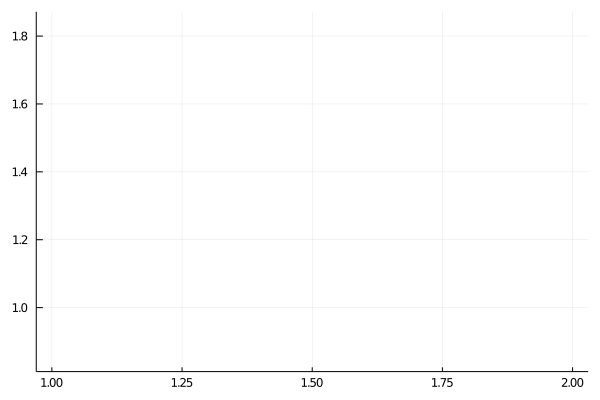

In [27]:
for n in eachindex(w)
    w = W[n]
    